We will also do a base model for comparison for the Bayesian latent AR process model. This model will be a regular sequential model, like an LSTM. For this model, we will use the extracted features and the corresponding densities. Something ot consider here is, we do get the extracted features from the previous exercise, however, did we also keep track of the corresponding densities? If we do not have the densities, we need to first get the densities, have them in a sequence, and then think about how best to fit the model. The base model may also have a encoder-decoder model? Or do we just use a dense neural network? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
from scipy import ndimage
import xml
import xml.etree.ElementTree as ET
import cv2
import math
import warnings
from skimage.transform import resize

2025-06-19 12:17:39.259926: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-19 12:17:39.296853: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-19 12:17:39.296881: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-19 12:17:39.297817: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-19 12:17:39.305290: I tensorflow/core/platform/cpu_feature_guar

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# First preprocess the data for the base model / or maybe even the Bayesian latent AR process model.

In [4]:
# First do it for a single block, and then repeat it for the rest of the blocks

In [5]:
# horizontal image dates?
horizontal_image_list = ['2020_08_03', '2020_08_04', '2020_08_06', '2020_08_07', '2020_08_11', '2020_08_12', '2020_08_14', '2020_08_15', '2020_08_17', '2020_08_18', '2020_08_19', '2020_08_21', '2020_08_25', '2020_08_26', '2020_08_27', '2020_08_28', '2020_08_31', '2020_09_02', '2020_09_07', '2020_09_16']

In [6]:
def get_horizontal_images(file_path):
    # get all contents at the file path
    all_files = os.listdir(file_path)
    # get only the image files as we do not need the xml files for the seq2seq model
    only_images = [file for file in all_files if file.split(".")[-1] == 'jpeg']
    # from all the images only choose the horizontal ones
    horizontal_images = [file for file in only_images if file.split('.')[0][-10:] in horizontal_image_list]
    # sort the list
    horizontal_images.sort()
    # return the image list
    return horizontal_images

In [7]:
# for block 0103
blk_0103_data_path = '../../Spring_2024/S_lab_TasselNet/Block_3_TN/Block_3_images_and_xml'

In [8]:
# What all is there? - both image and xml files

In [9]:
# get the horizontal images?
horizontal_images = get_horizontal_images(blk_0103_data_path)

In [10]:
horizontal_images

['Block0103_2020_08_03.jpeg',
 'Block0103_2020_08_04.jpeg',
 'Block0103_2020_08_06.jpeg',
 'Block0103_2020_08_07.jpeg',
 'Block0103_2020_08_11.jpeg',
 'Block0103_2020_08_12.jpeg',
 'Block0103_2020_08_14.jpeg',
 'Block0103_2020_08_15.jpeg',
 'Block0103_2020_08_17.jpeg',
 'Block0103_2020_08_18.jpeg',
 'Block0103_2020_08_19.jpeg',
 'Block0103_2020_08_21.jpeg',
 'Block0103_2020_08_25.jpeg',
 'Block0103_2020_08_26.jpeg',
 'Block0103_2020_08_27.jpeg',
 'Block0103_2020_08_28.jpeg',
 'Block0103_2020_08_31.jpeg',
 'Block0103_2020_09_02.jpeg',
 'Block0103_2020_09_07.jpeg',
 'Block0103_2020_09_16.jpeg']

In [11]:
# create a list of xml files for these images using the list created
horizontal_xml_files = [i.split('.')[0] + '.xml' for i in horizontal_images]

In [12]:
horizontal_xml_files

['Block0103_2020_08_03.xml',
 'Block0103_2020_08_04.xml',
 'Block0103_2020_08_06.xml',
 'Block0103_2020_08_07.xml',
 'Block0103_2020_08_11.xml',
 'Block0103_2020_08_12.xml',
 'Block0103_2020_08_14.xml',
 'Block0103_2020_08_15.xml',
 'Block0103_2020_08_17.xml',
 'Block0103_2020_08_18.xml',
 'Block0103_2020_08_19.xml',
 'Block0103_2020_08_21.xml',
 'Block0103_2020_08_25.xml',
 'Block0103_2020_08_26.xml',
 'Block0103_2020_08_27.xml',
 'Block0103_2020_08_28.xml',
 'Block0103_2020_08_31.xml',
 'Block0103_2020_09_02.xml',
 'Block0103_2020_09_07.xml',
 'Block0103_2020_09_16.xml']

In [13]:
# now need to create the density maps and then the corresponding stacks for the densities

In [14]:
# For this base model at least, we only need the density maps for the last 7 images. So for the moment, we will only work with those? 

In [15]:
# last 7 image files and xml files
im_files_for_densities = horizontal_images[-7:]
im_files_for_densities.sort()
xml_files_for_densities = horizontal_xml_files[-7:]
xml_files_for_densities.sort()

In [16]:
# im_files_for_densities, xml_files_for_densities

In [17]:
# just the file names 
all_file_names = [file.split('.')[0] for file in im_files_for_densities]

In [18]:
# all_file_names

In [19]:
# for vertically annotated images
def get_density_maps_horizontal(file_name, image_path, xml_path, save_density_path):
    xml_file = file_name + '.xml'
    xml_file_path = os.path.join(xml_path, xml_file)

    # Get coords from the xml file
    # parse the xml file
    parsed_file = ET.parse(xml_file_path)
    # get the roots
    root = parsed_file.getroot()
    # get the roots here
    coords = []
    for child in root:
        for i in child:
            for j in i:
                coords.append(int(j.text))
    
    # chunk the points into sets of 4 - these are the coordinates of the bounding boxes
    points_tupples = []
    for i in range(0, len(coords), 4):
        points_tupples.append(coords[i:i + 4])

    # make a dataframe with these points
    coords_df = pd.DataFrame(points_tupples, columns = ["bleft_x", "bleft_y", "tright_x", "tright_y"])

    # compute the number of tassels in each image
    no_of_tassels = len(points_tupples)

    # compute the mid coordinates
    coords_df["mid_x"] = (round(0.5*(coords_df["bleft_x"] + coords_df["tright_x"]))).astype(int)
    coords_df["mid_y"] = (round(0.5*(coords_df["bleft_y"] + coords_df["tright_y"]))).astype(int)

    # extract the mid cordinates
    mid_coords = coords_df[["mid_x", "mid_y"]]
    # cap the coords at the max height and width values
    mid_coords.loc[mid_coords['mid_x'] > 1024, 'mid_x'] = 1023
    mid_coords.loc[mid_coords['mid_y'] > 768, 'mid_y'] = 767
    warnings.filterwarnings("ignore")

    # plot the bounding boxes on images
    # get image name and path
    image_name = file_name + '.jpeg'
    imge_file_path = os.path.join(image_path, image_name)
    # read the image
    read_image = plt.imread(imge_file_path)
    read_image = ndimage.rotate(read_image, 0)

    # check the shape of the read image
    read_image_shape = read_image.shape
    #  plot the bounding boxes on the image
    for points in points_tupples:
        annotated_image = cv2.rectangle(read_image, (points[0],points[1]), (points[2],points[3]), color = (255,0,0), thickness = 2)
    # plt.figure(figsize = (12,18))
    plt.imshow(annotated_image)
    plt.show()

    # plot the mid points on the image
    coords_list = mid_coords.values.tolist()
    # read the image again
    read_image_again = plt.imread(imge_file_path)
    read_image_again = ndimage.rotate(read_image_again, 0)
    # draw the circles on image
    for i in coords_list:
        image_with_mids = cv2.circle(read_image_again, i, radius=5, color=(255, 0, 0), thickness=-1)
    # look at the annotated image
    # plt.figure(figsize = (12,18))
    plt.imshow(image_with_mids)
    plt.show()

    # also try creating the density map here
    # first create the empty maps
    np_image = np.zeros((read_image_shape[0], read_image_shape[1]))
    # get the dot maps
    for point in coords_list:
        np_image[point[1], point[0]] = 1
    # plot the image
    # plt.figure(figsize = (12,18))
    plt.imshow(np_image, cmap = "Greys")
    plt.show()

    # now define the kernel and run the convolution
    one_d_kerenel = cv2.getGaussianKernel(50,5)
    two_d_kernel = np.multiply(one_d_kerenel.T, one_d_kerenel)

    # Shape of the 2D kernel
    twoD_shape = two_d_kernel.shape
        
    # do the convolution
    convolution = ndimage.convolve(np_image, two_d_kernel)
        
    # plot the density map
    # plt.figure(figsize = (12,18))
    plt.imshow(convolution, cmap = "Greys")
    plt.show()
        
    # get the sums of the images
    img_sum = np.sum(convolution)

    # save the density map
    np.save(save_density_path + '/' + file_name + '_density_map.npy', convolution)

    return(file_name, read_image_shape, no_of_tassels, img_sum, convolution)

In [20]:
# where to sve the convolved density maps?
save_densities_here = 'all_density_maps/block_0101'

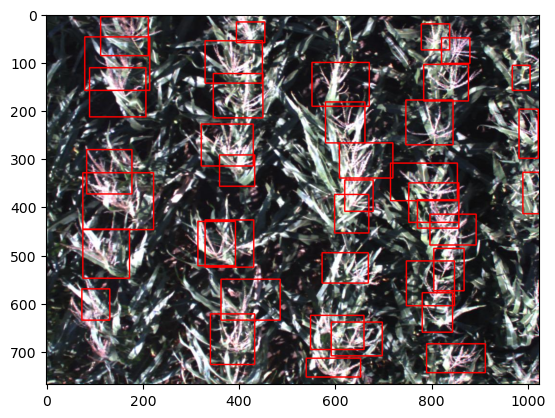

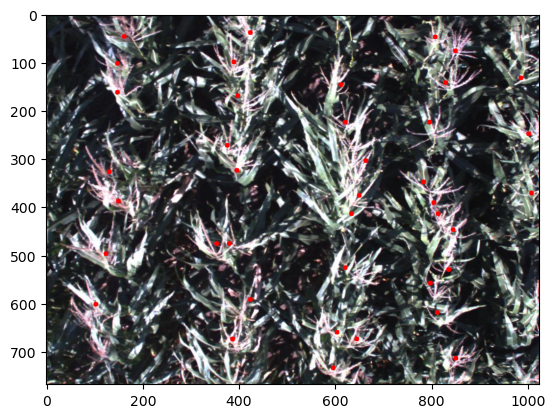

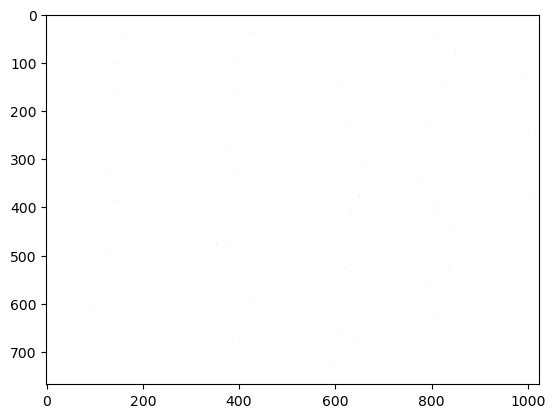

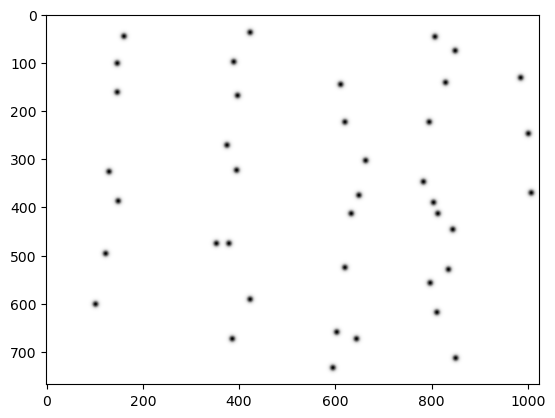

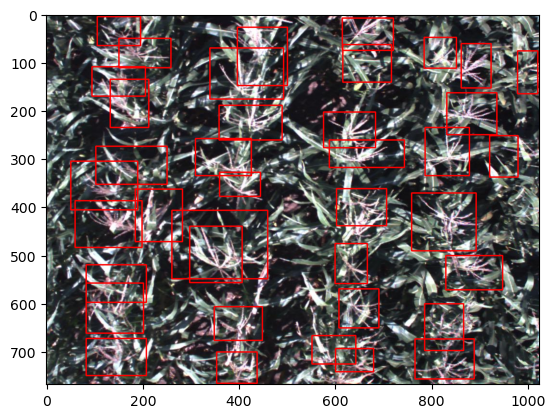

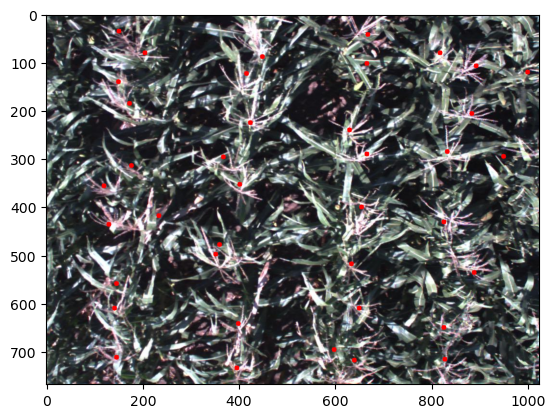

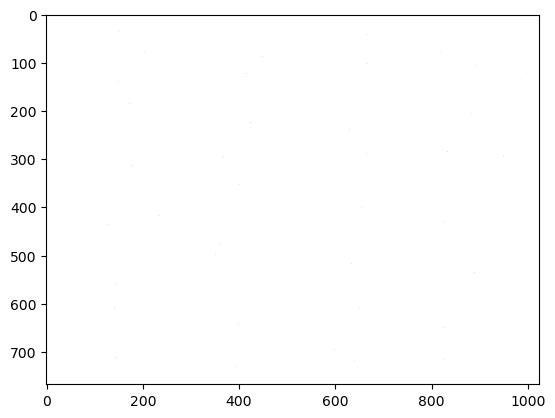

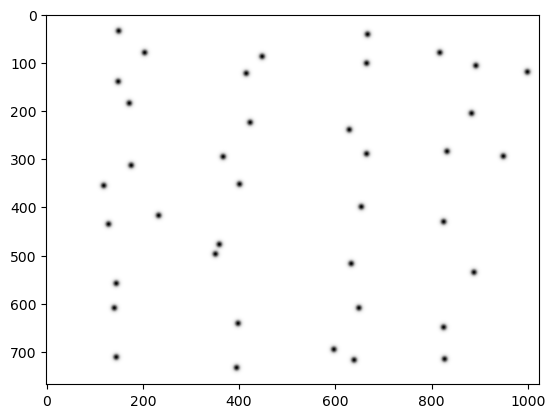

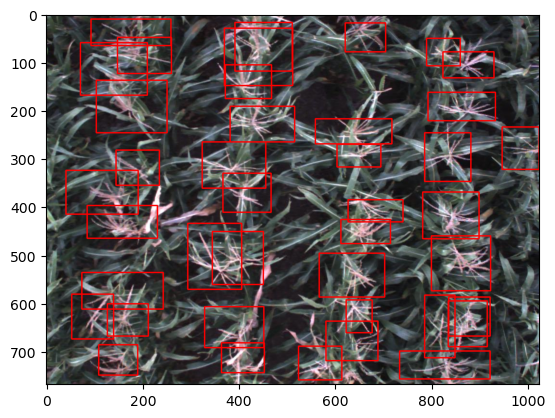

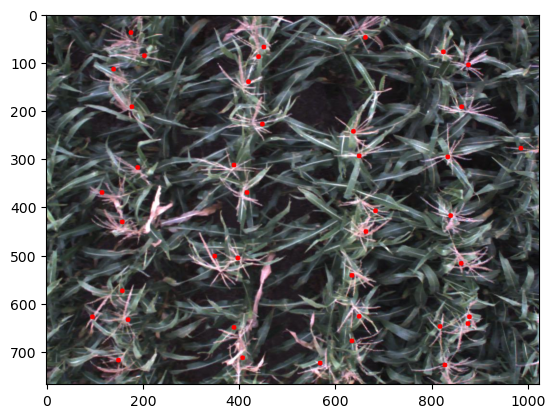

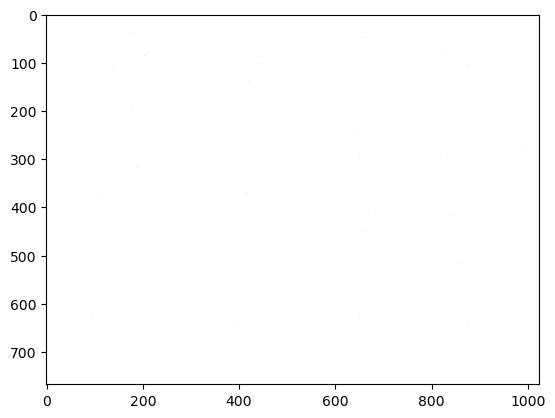

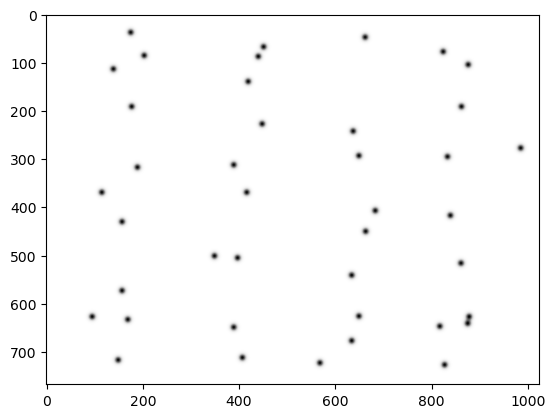

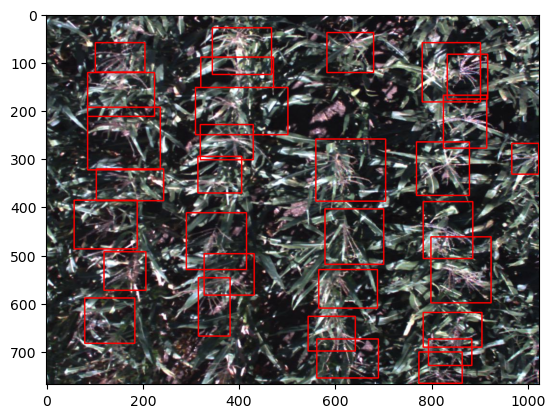

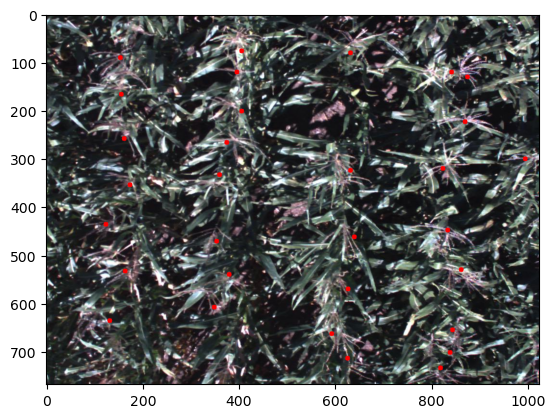

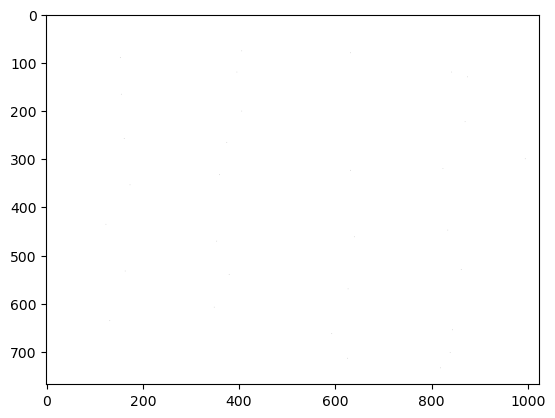

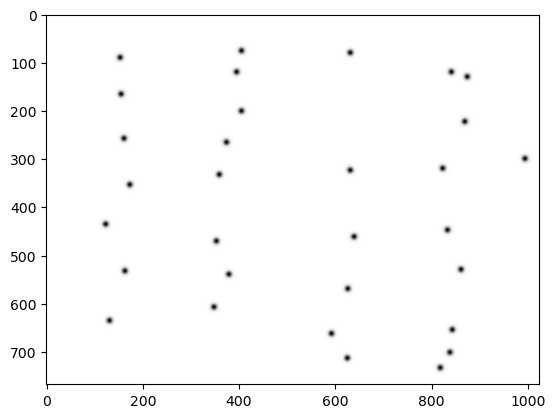

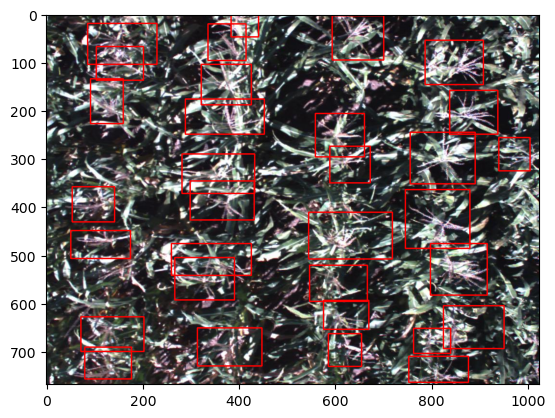

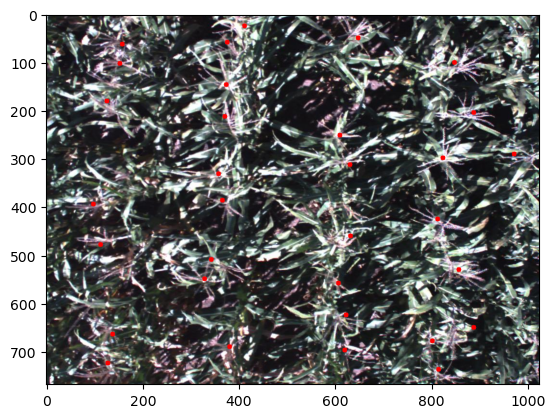

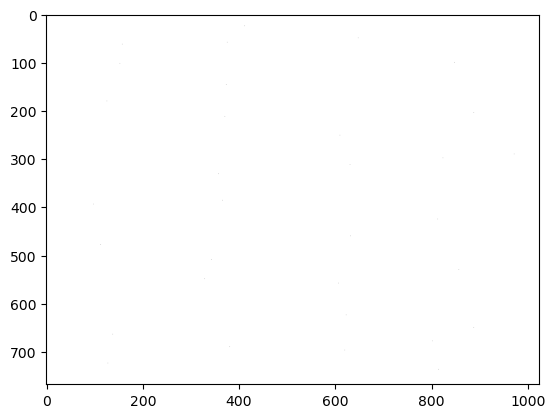

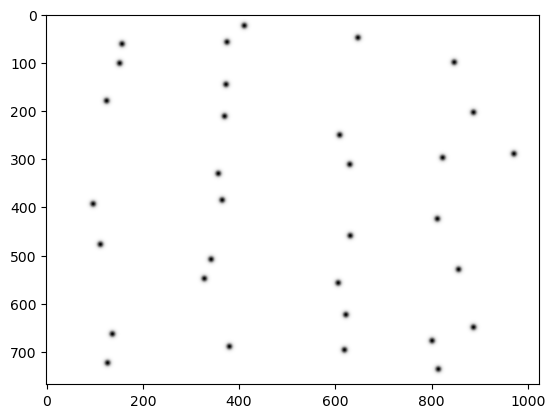

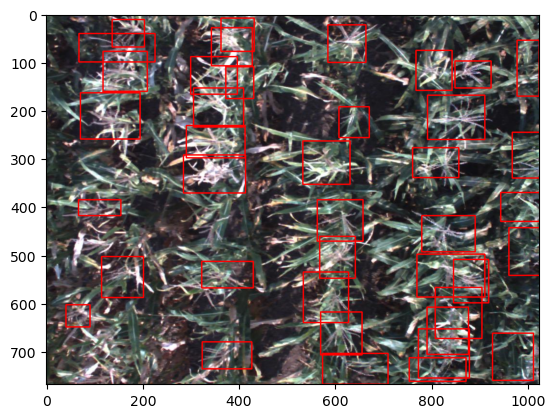

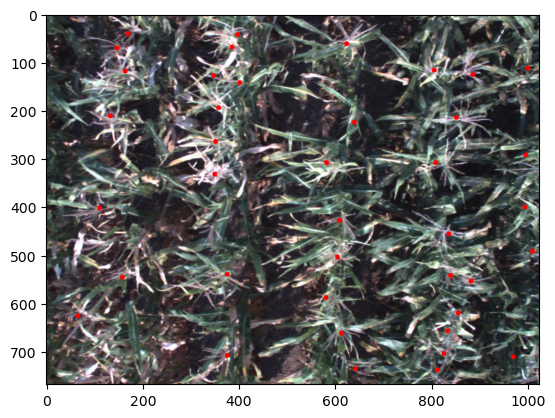

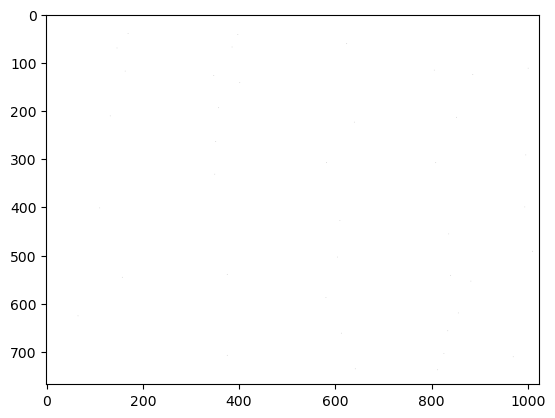

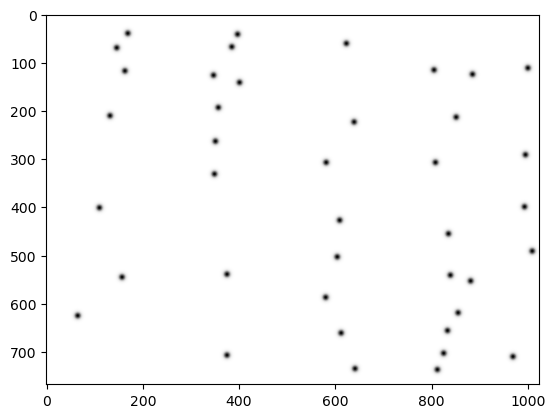

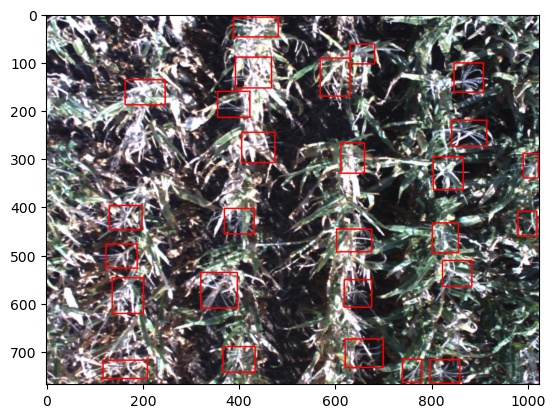

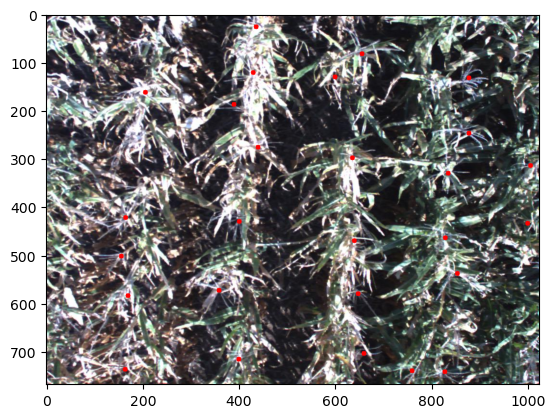

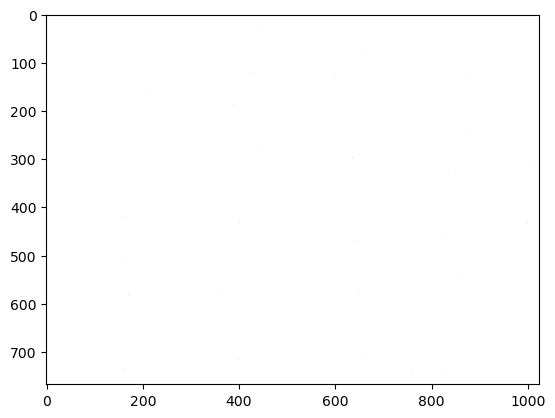

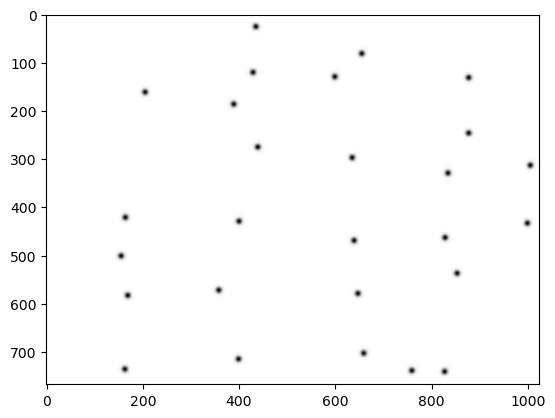

CPU times: user 22.5 s, sys: 195 ms, total: 22.7 s
Wall time: 23 s


In [21]:
%%time
# get the density maps for all vertically annotated image files
names_all_h = []
shapes_all_h = []
tasselCounts_all_h = []
tasselDensities_all_h = []
dense_maps_all_h = []
for file_h in all_file_names:
    name_h, shape_h, tassels_h, tassel_dense_h, dense_map_h = get_density_maps_horizontal(file_h, blk_0103_data_path, blk_0103_data_path, save_densities_here)
    names_all_h.append(name_h)
    shapes_all_h.append(shape_h)
    tasselCounts_all_h.append(tassels_h)
    tasselDensities_all_h.append(tassel_dense_h)
    dense_maps_all_h.append(dense_map_h)
    